# Business objective 

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations 

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Aim:
The aim of this competition is to predict the sale price of residential homes in Ames, Iowa. We will practice feature engineering and regression algorithms to achieve the lowest prediction error  ( RMSE - root mean square error)

** RMSE has the benefit of penalizing large errors more so can be more appropriate in some use csae


## link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques



In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')

#Use this code to show all the 163 columns
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

from scipy.stats import skew
from scipy.special import boxcox1p , inv_boxcox

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
import xgboost as xgb
import lightgbm as lgb

from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder



# Exploratory data analysis

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## combine both train and test data
all_df = train.append(test)

In [3]:
train = all_df




In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
## check dataframe total row and columns
train.shape

(1460, 81)

In [8]:
## descriptive statistics summary
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


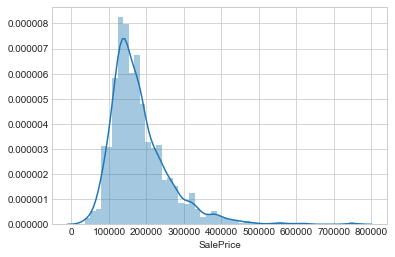

In [10]:
# dist histogram on sales price
sns.distplot( train['SalePrice'])

the sales price is right skewed, we need to do some transformation ( log transformation, cox-box) before proceed to modeling , this is to ensure good model output

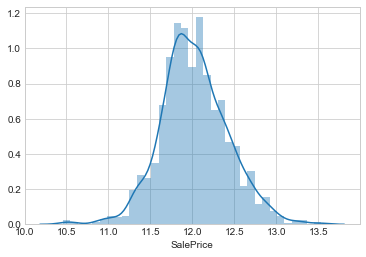

In [11]:
# dist histogram on sales price ( after log transofrm)   
# note: np.log1p  work better than np.log


logSalePrice = np.log1p( train['SalePrice'] )
         
sns.distplot( logSalePrice  )

using log-transform to normal distribution

In [13]:
##  correlation between numeric features vs Sales Price
corr = train.corr()

corr_df = corr['SalePrice'].sort_values(ascending=False).head(10).to_frame()

## seaborn plotting color palette
cm = sns.light_palette("cyan", as_cmap=True)

r = corr_df.style.background_gradient(cmap=cm)
r


,SalePrice
SalePrice,1
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


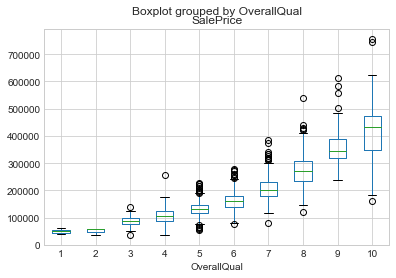

In [86]:
## boxplot
train.boxplot(column = 'SalePrice' , by='OverallQual')

# train.boxplot(column = 'SalePrice' , by='GrLivArea')

In [14]:
## freq count 
train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [16]:
## boxplot
# train.boxplot(column = 'SalePrice' , by='Neighborhood')

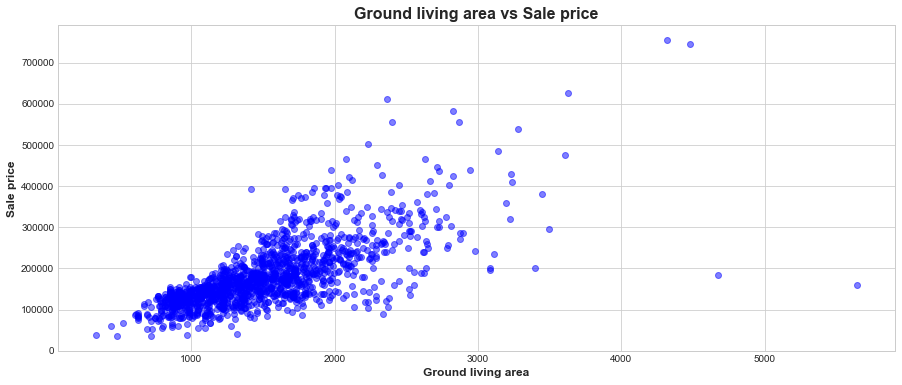

In [17]:
## scatter plot visualization
plt.figure(figsize=(15,6))
plt.scatter(x= train['GrLivArea'], y= train['SalePrice'], color='blue', alpha=0.5)
plt.title('Ground living area vs Sale price', weight='bold', fontsize=16)
plt.xlabel('Ground living area', weight='bold', fontsize=12)
plt.ylabel('Sale price', weight='bold', fontsize=12)
plt.show()

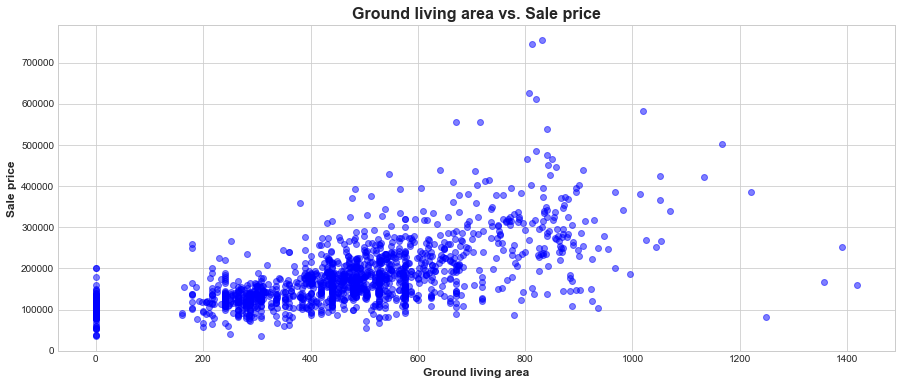

In [18]:
## scatter plot visualization
plt.figure(figsize=(15,6))
plt.scatter(x= train['GarageArea'], y= train['SalePrice'], color='blue', alpha=0.5)
plt.title('Ground living area vs. Sale price', weight='bold', fontsize=16)
plt.xlabel('Ground living area', weight='bold', fontsize=12)
plt.ylabel('Sale price', weight='bold', fontsize=12)
plt.show()

** Summary on numeric features correlation with sales price:**
- the top 5 features highly correlated with the sale price: **overall quality**, **ground living area, basement area, garage cars and garage area** 

* Some other features like **full bathroom availability** or **1st floor surface area** have quite high correlation with sales price. These features are luxury features, more luxury = Higher price.

* **Year built** the newer buildings tend to have higher sale prices.


Next step we shall look into the categorical features like good location. A good locations & neighbourhood and near to town nowadays are more expensive




## data cleaning

In [19]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [66]:
all_df.isnull().sum().sort_values(ascending=False)

SalePrice        1459
PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
LotFrontage       486
GarageFinish      159
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtFullBath        2
BsmtHalfBath        2
Utilities           2
Functional          2
Electrical          1
Exterior2nd         1
KitchenQual         1
Exterior1st         1
GarageCars          1
TotalBsmtSF         1
                 ... 
Neighborhood        0
YearBuilt           0
WoodDeckSF          0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleCondition       0
RoofStyle           0
RoofMatl            0
PoolArea            0
PavedDrive          0
OverallQual         0
OverallCond         0
OpenPorchSF         0
MoSold    


summary:
* the top 5 features with highest missing value **Pool QC, MiscFeature, Alley, Fence,FireplaceQu ** (which is all categorical variables) 

- Most of the features we will fill it with 0s as we assume that they don't exist, for example GarageArea, GarageCars with missing values are simply because the house lacks a garage.

- GarageYrBlt: Year garage was built can't be filled with 0s, so we fill with the median (1980).



## feature engineering

Some of the features that may be misinterpreted to represent something it's not. For example,

MSSubClass: Identifies the type of dwelling involved in the sale.

    20 1-STORY 1946 & NEWER ALL STYLES
    30 1-STORY 1945 & OLDER
    40 1-STORY W/FINISHED ATTIC ALL AGES
    45 1-1/2 STORY - UNFINISHED ALL AGES
    50 1-1/2 STORY FINISHED ALL AGES
    60 2-STORY 1946 & NEWER
    70 2-STORY 1945 & OLDER
    75 2-1/2 STORY ALL AGES
    80 SPLIT OR MULTI-LEVEL
    85 SPLIT FOYER
    90 DUPLEX - ALL STYLES AND AGES
    120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    150 1-1/2 STORY PUD - ALL AGES
    160 2-STORY PUD - 1946 & NEWER
    180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    190 2 FAMILY CONVERSION - ALL STYLES AND AGES
    
This feature was interpreted as numerical when it is actually categorical.

In [49]:
train['MSSubClass'].describe()


count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [53]:
# convert MSSubClass( The building class) into categorical
train['MSSubClass'] = train['MSSubClass'].apply(str)

# convert OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)

# convert Year and month into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

## handle missing value

In [54]:

selected_col = ['PoolQC','MiscFeature', 'Alley', 'Fence','FireplaceQu']

## fill the selected feature with 'None'
train[selected_col] = train[selected_col].fillna("None")

## fill the rest with 0
train = train.fillna(0)

- PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

- MiscFeature : data description says NA means "no misc feature"

- Alley : data description says NA means "no alley access"

- Fence : data description says NA means "no fence"

- FireplaceQu : data description says NA means "no fireplace"

## handle skewed features

In [55]:
## identify numeric features
numeric_feature = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train[numeric_feature].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)

,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


## apply box cox transformation on skewed

In [60]:

## define skewness
skewness = skewness[abs(skewness) > 0.75]

skewed_features = skewness.index
lam = 0   ## box-cox lambda = 1 is no transofrm, lambda = 0 is do log transform

## box cox transform on skewed features
for feat in skewed_features:
    train[feat] = boxcox1p(train[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

In [61]:
skewness.index

Index(['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
       'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
       'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF', 'SalePrice', 'BsmtFinSF1',
       'WoodDeckSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtUnfSF',
       '2ndFlrSF', 'TotRmsAbvGrd', 'HalfBath', 'Fireplaces', 'BsmtFullBath',
       'LotFrontage', 'OverallQual', 'BedroomAbvGr', 'GarageArea', 'FullBath',
       'Id', 'GarageCars', 'YearRemodAdd', 'YearBuilt', 'GarageYrBlt'],
      dtype='object')

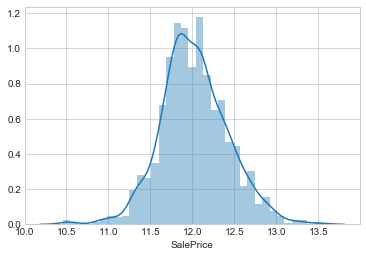

In [62]:
# dist histogram on sales price (after box-cox transform)
sns.distplot( train['SalePrice'])

use log-trasform into normal distribution 

## label encoding for categorical variables (ordinal data)

In [113]:
from sklearn.preprocessing import LabelEncoder

## perform Label Encoding some categorical variables that contain information in an ordering set


selected_column = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')


# process columns, apply LabelEncoder to categorical features
for c in selected_column:
    le = LabelEncoder() 
    le.fit(list(train[c].values)) 
    train[c] = le.transform(list(train[c].values))


In [115]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.693147,9,RL,4.189655,9.042040,1,1,3,Lvl,AllPub,...,0.0,3,4,None,0.0,4,2,WD,Normal,12.247699
1,1.098612,4,RL,4.394449,9.169623,1,1,3,Lvl,AllPub,...,0.0,3,4,None,0.0,7,1,WD,Normal,12.109016
2,1.386294,9,RL,4.234107,9.328212,1,1,0,Lvl,AllPub,...,0.0,3,4,None,0.0,11,2,WD,Normal,12.317171
3,1.609438,10,RL,4.110874,9.164401,1,1,0,Lvl,AllPub,...,0.0,3,4,None,0.0,4,0,WD,Abnorml,11.849405
4,1.791759,9,RL,4.442651,9.565284,1,1,0,Lvl,AllPub,...,0.0,3,4,None,0.0,3,2,WD,Normal,12.429220


##  create dummy variables categorical features ( not ordinal data)

In [121]:
#convert categorical variable into dummy
train_final = pd.get_dummies(train)

In [122]:
train_final.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.693147,9,4.189655,9.042040,1,1,3,0,2.079442,4,...,0,0,0,1,0,0,0,0,1,0
1,1.098612,4,4.394449,9.169623,1,1,3,0,1.945910,7,...,0,0,0,1,0,0,0,0,1,0
2,1.386294,9,4.234107,9.328212,1,1,0,0,2.079442,4,...,0,0,0,1,0,0,0,0,1,0
3,1.609438,10,4.110874,9.164401,1,1,0,0,2.079442,4,...,0,0,0,1,1,0,0,0,0,0
4,1.791759,9,4.442651,9.565284,1,1,0,0,2.197225,4,...,0,0,0,1,0,0,0,0,1,0


In [123]:
train_final.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandSlope', 'OverallQual', 'OverallCond',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=226)

# Model development

## train test split

In [129]:


X= train_final.drop(columns = 'SalePrice')
y= train_final['SalePrice']


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42) ## test sample 20%

In [130]:
X_train.shape

(1168, 225)

In [131]:
# Cross-validation with k-folds
n_folds = 5


## degine cross-validation function
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

## Model -Linear regression

In [132]:

linear_model =LinearRegression()


In [133]:

## train model
linear_model.fit(X_train, y_train )


## model prediction on test data
preds = linear_model.predict( X_test )


In [134]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)

print("RMSE: %f" % (rmse) ,  "MAE: %f" % (mae)  )

RMSE: 0.126515 MAE: 0.087228


## Model - RandomForest Regressor

In [135]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=1000)

In [136]:

## train model
rf_model.fit(X_train, y_train )


## model prediction on test data
preds = rf_model.predict( X_test )

In [137]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)

print("RMSE: %f" % (rmse) ,  "MAE: %f" % (mae)  )

RMSE: 0.147165 MAE: 0.098252


## Model  - Xgboost regressor

In [138]:
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 100)


xg_reg = xgb.XGBRegressor()

In [139]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[20:45:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [140]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)

print("RMSE: %f" % (rmse) ,  "MAE: %f" % (mae)  )

RMSE: 0.151136 MAE: 0.100833


In [141]:
# save the model to disk
filename = 'model/xgboost_regressor.sav'
joblib.dump(xg_reg, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)

[20:45:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## Model -  Xgboost regressor  ( custom parameter)

In [173]:
## custom model
xgb_model = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.5, n_estimators=1000,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)



# xgb_model = xgb.XGBRegressor(learning_rate =0.01, n_estimators=3460, max_depth=3,
#                      min_child_weight=0 ,gamma=0, subsample=0.7,
#                      colsample_bytree=0.7,objective= 'reg:linear',
#                      nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006)



In [174]:
xgb_model.fit(X_train,y_train)

preds = xgb_model.predict(X_test)

In [175]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)

print("RMSE: %f" % (rmse) ,  "MAE: %f" % (mae)  )

RMSE: 0.138054 MAE: 0.094383


In [179]:
# save the model to disk
filename = 'model/xgboost_model_v2.sav'
joblib.dump(xg_reg, filename)
 

['model/xgboost_model_v2.sav']

## Model -  LightGBM

In [168]:
## custom lightGBM model

lightgbm_model = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators= 1000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.22,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

# lightgbm_model = lgb.LGBMRegressor(objective='regression')

In [166]:
# 

In [102]:
lightgbm_model.fit(X_train,y_train)

preds = lightgbm_model.predict(X_test)

In [194]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)

print("RMSE: %f" % (rmse) ,  "MAE: %f" % (mae)  )

RMSE: 27424.017035 MAE: 15340.569298 r2-score: 0.901950


## cross validation score for all model 

In [176]:
%%time

linear_model_score = rmsle_cv( linear_model)
print("Linear Regression RMSE score: {:.4f} ( std: {:.4f} )\n".format( linear_model_score.mean(), linear_model_score.std()) )

rf_model_score = rmsle_cv( rf_model)
print("RandomForest Regressor RMSE score: {:.4f} ( std: {:.4f} )\n".format( rf_model_score.mean(), rf_model_score.std()) )

xgb_model_score = rmsle_cv(xgb_model)
print("Xgboost RMSE score: {:.4f} ( std: {:.4f} )\n".format( xgb_model_score.mean(), xgb_model_score.std()) )

lightgbm_model_score = rmsle_cv(lightgbm_model)
print("LightGBM RMSE score: {:.4f} ( std: {:.4f} )\n".format( lightgbm_model_score.mean(), lightgbm_model_score.std()) )



Linear Regression RMSE score: 0.1430 ( std: 0.0170 )

RandomForest Regressor RMSE score: 0.1448 ( std: 0.0200 )

Xgboost RMSE score: 0.1279 ( std: 0.0154 )

LightGBM RMSE score: 0.1225 ( std: 0.0139 )

Wall time: 1min 57s



** the cv result show the model with lowest RMSE is LightGBM model, followed by Xgboost

## Other info - xgboost variable importance plot

In [182]:
## show feature importance 
xgb_model.feature_importances_

array([2.1521805e-03, 2.3741748e-03, 2.9768725e-03, 5.5991230e-03,
       0.0000000e+00, 2.5782932e-03, 1.8895337e-03, 2.3436130e-03,
       7.4271746e-02, 4.6173120e-03, 7.7156913e-03, 7.0256628e-03,
       3.8690954e-03, 2.2565746e-03, 5.1811920e-03, 3.8834740e-03,
       6.0898564e-03, 4.8358040e-03, 2.4678926e-03, 7.2363396e-03,
       2.8403609e-03, 1.5203698e-03, 2.7362085e-03, 7.8664785e-03,
       3.1920441e-03, 2.8332975e-02, 6.5350113e-03, 7.9832217e-03,
       1.6622931e-03, 2.7210994e-02, 6.8544648e-03, 2.6931101e-03,
       9.7443275e-03, 2.3860727e-03, 4.8444723e-03, 1.4105657e-02,
       4.8002372e-03, 5.3711841e-03, 3.6238320e-03, 2.2885343e-02,
       2.6590673e-03, 4.9468218e-03, 2.5883694e-03, 2.7657883e-02,
       1.2432586e-02, 6.1863614e-03, 1.8117942e-02, 2.0456016e-03,
       2.5064650e-03, 2.6365838e-03, 2.3330587e-03, 1.0928268e-03,
       2.0129629e-03, 0.0000000e+00, 2.2421582e-03, 4.2206133e-03,
       3.1377031e-03, 2.7923223e-03, 2.0007624e-03, 2.1715993e

In [155]:
## show top 20 important variables

results=pd.DataFrame()

results['columns']= X_train.columns

results['importances'] = xgb_model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)


## top n field importance score
results[:20]


,columns,importances
47,OverallQual,0.062487
25,GarageCars,0.060721
21,Fireplaces,0.053577
30,GrLivArea,0.042243
128,GarageType_Attchd,0.041749
54,TotalBsmtSF,0.033737
57,YearRemodAdd,0.029849
161,MSZoning_RM,0.026377
56,YearBuilt,0.026156
26,GarageCond,0.024094


- not suprisely the OverallQual place the highest importance, and it followed GarageCars and Fireplaces (which need more detail analysis to understand the reason) 
- Ground Living Area is important to predict the sales price 

In [39]:
## plot variable importance

# xgb.plot_importance(xg_reg)
# plt.rcParams['figure.figsize'] = [30, 100]
# plt.show()

## reverse cox-box to get the actual price value

In [197]:
## lets use the best model LigttGBM to do prediction
lightgbm_model.fit(X_train,y_train)
preds = lightgbm_model.predict(X_test)

In [198]:
lam =0  ## lambda = 0 , log transform

preds_actual = inv_boxcox( preds, lam)

y_test_actual = inv_boxcox( y_test, lam)

res_df = pd.DataFrame( {'Actual SalePrice':y_test_actual , 'Predict SalePrice': preds_actual } )
res_df.head(10)

,Actual SalePrice,Predict SalePrice
892,154501.0,144453.133239
1105,325001.0,348146.059821
413,115001.0,106700.322794
522,159001.0,156606.708634
1036,315501.0,344288.666743
614,75501.0,72787.464713
218,311501.0,246048.837554
1160,146001.0,139773.356300
649,84501.0,73004.262747
887,135501.0,142514.940949


In [207]:
res_df.shape

(292, 2)

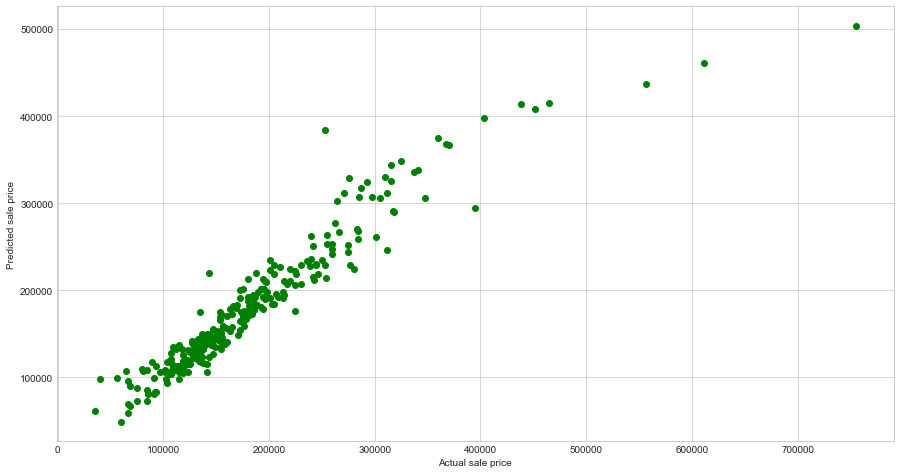

RMSE: 27424.017035 MAE: 15340.569298 r2-score: 0.901950


In [206]:
## scatter plot on actual sale prices vs predicted sale price

plt.figure(figsize=(15,8))
plt.scatter(y_test_actual,preds_actual,c='green')
plt.xlabel('Actual sale price')
plt.ylabel('Predicted sale price')
plt.show()

## evaluation metric
rmse = np.sqrt(mean_squared_error( y_test_actual, preds_actual))
mae = mean_absolute_error( y_test_actual, preds_actual)
r2 = r2_score( y_test_actual, preds_actual)

print("RMSE: %f" % (rmse) ,  "MAE: %f" % (mae) , "r2-score: %f" % (r2)  )



** r2-score = 0.90,  model fitted line able to explains 90%  variability of the response data around its mean,


# test on kaggle test.csv and submission

In [6]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## combine both train and test data
all_df = train.append(test)

In [31]:



def data_prep(train):
    ##### convert to proper datatype ######3

    # convert MSSubClass( The building class) into categorical
    train['MSSubClass'] = train['MSSubClass'].apply(str)

    # convert OverallCond into a categorical variable
    train['OverallCond'] = train['OverallCond'].astype(str)

    # convert Year and month into categorical features.
    train['YrSold'] = train['YrSold'].astype(str)
    train['MoSold'] = train['MoSold'].astype(str)


    ##### handle missing value #######

    selected_col = ['PoolQC','MiscFeature', 'Alley', 'Fence','FireplaceQu']

    ## fill the selected feature with 'None'
    train[selected_col] = train[selected_col].fillna("None")

    ## fill the rest with 0
    train = train.fillna(0)


    ##### handle skewed data #####

    ## identify numeric features
    numeric_feature = train.dtypes[train.dtypes != "object"].index
    numeric_feature = numeric_feature.drop( ['SalePrice','Id'])

    # Check the skew of all numerical features
    skewed_feats = train[numeric_feature].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    skewness = pd.DataFrame({'Skew' :skewed_feats})


    ## define skewness
    skewness = skewness[abs(skewness) > 0.75]

    skewed_features = skewness.index
    lam = 0   ## box-cox lambda = 1 is no transofrm, lambda = 0 is do log transform

    ## box cox transform on skewed features
    for feat in skewed_features:
        train[feat] = boxcox1p(train[feat], lam)



    ## perform Label Encoding some categorical variables that contain information in an ordering set ## 

    selected_column = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
            'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
            'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
            'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
            'YrSold', 'MoSold')


    # process columns, apply LabelEncoder to categorical features
    for c in selected_column:
        le = LabelEncoder() 
        le.fit(list(train[c].values)) 
        train[c] = le.transform(list(train[c].values))



    #convert categorical variable into dummy
    train_final = pd.get_dummies(train)
    
    return train_final

In [142]:
all_df_final = data_prep(all_df)

In [143]:
all_df_final.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Utilities_0,Utilities_AllPub,Utilities_NoSeWa
0,6.753438,6.751101,0.0,1,1.386294,4,4,6.561031,0.0,3,...,0,0,0,0,0,0,1,0,1,0
1,7.141245,0.000000,0.0,1,1.386294,4,2,6.886532,0.0,1,...,0,0,0,0,0,0,1,0,1,0
2,6.825460,6.765039,0.0,1,1.386294,4,3,6.188264,0.0,3,...,0,0,0,0,0,0,1,0,1,0
3,6.869014,6.629363,0.0,1,1.386294,2,4,5.379897,0.0,1,...,0,0,0,0,0,0,1,0,1,0
4,7.044033,6.960348,0.0,1,1.609438,4,1,6.486161,0.0,3,...,0,0,0,0,0,0,1,0,1,0


In [144]:
## perform log transformation on saleprice 

all_df_final['SalePrice'] = np.log1p( all_df_final['SalePrice'] )


In [145]:
new_train = all_df_final[:1459]
new_test = all_df_final[1460:]

## train the model together with kaggle train + test dataset

In [146]:
X= new_train.drop(columns = 'SalePrice')
y= new_train['SalePrice']


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42) ## test sample 20%

In [147]:
## custom model
# xgb_model = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
#                              learning_rate=0.05, max_depth=5, 
#                              min_child_weight=1.5, n_estimators=1000,
#                              reg_alpha=0.9, reg_lambda=0.6,
#                              subsample=0.2,seed=42, silent=1,
#                              random_state =7)


xgb_model = xgb.XGBRegressor(learning_rate =0.01, n_estimators=3460, max_depth=3,
                     min_child_weight=0 ,gamma=0, subsample=0.7,
                     colsample_bytree=0.7,objective= 'reg:linear',
                     nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006)



xgb_model.fit(X_train,y_train)

preds = xgb_model.predict(X_test)

[14:56:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [148]:
res_df = pd.DataFrame( {'Actual SalePrice':y_test , 'Predict SalePrice': preds } )


In [149]:
res_df.head(10)

,Actual SalePrice,Predict SalePrice
1321,11.191356,11.293250
836,11.941462,11.911294
413,11.652696,11.544578
522,11.976666,11.939441
1035,11.338584,11.240180
614,11.231901,11.290888
218,12.649158,12.411690
1031,12.190964,12.291317
1289,12.546114,12.531022
886,11.884496,11.969108


In [150]:
## evaluation metric
rmse = np.sqrt(mean_squared_error( y_test, preds))
mae = mean_absolute_error( y_test, preds)
r2 = r2_score(y_test, preds)

print("RMSE: %f" % (rmse) ,  "MAE: %f" % (mae) , "r2-score: %f" % (r2)  )

RMSE: 0.121774 MAE: 0.081257 r2-score: 0.911363


## stacking model using average method

In [166]:
xgb_preds = xgb_model.predict( new_test.drop(columns = ['Id']) , validate_features= False)

In [167]:
xgb_preds

array([11.518635, 11.716638, 12.000969, ..., 11.822684, 11.523099,
       12.042677], dtype=float32)

In [171]:
lightgbm_model.fit(X_train,y_train)


lgbm_preds = lightgbm_model.predict( new_test.drop(columns = ['Id']) , validate_features= False)

In [172]:
lgbm_preds

array([11.50750263, 11.72961396, 11.95076378, ..., 11.69860897,
       11.49367155, 12.05547277])

In [173]:
stack_preds = ( (0.5*xgb_preds) + (0.5*lgbm_preds)  )

In [174]:
stack_preds

array([11.51306871, 11.72312579, 11.97586636, ..., 11.76064663,
       11.50838525, 12.04907485])

In [175]:
lam = 0  ## lambda = 0 , log transform
stack_preds = inv_boxcox( stack_preds, lam)

In [176]:
stack_preds

array([100014.32584459, 123392.52165887, 158873.94321688, ...,
       128110.26617876,  99547.00752134, 170941.18791442])

In [177]:
res = pd.DataFrame( {'Id':new_test.Id , 'SalePrice': stack_preds } )
res.to_csv('result/submission_kim_v3_stackMethod.csv' , index = False)